# BELTRANS statistics

This notebook creates and displays statistics about the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import utils
from datetime import datetime

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03-translation-stats.csv', '2022-05-09-translation-stats.csv', 
    '2022-05-23-translation-stats.csv', '2022-06-07-translation-stats.csv',
    '2022-06-16-translation-stats.csv'
]

In [3]:
translationStats = utils.mergeMeasurementsToDataFrame('.', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL']
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR']
statsOther = translationStats[translationStats['corpus'] == 'OTHER']

## Identifiers
The total number of translations and how much have which third party identifier.

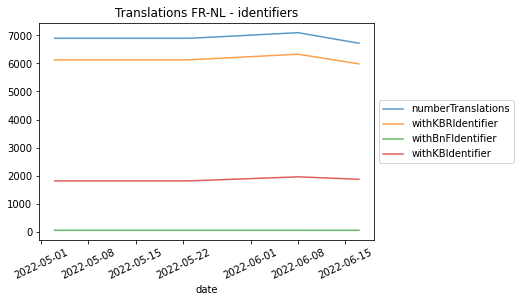

In [4]:
utils.plotTranslationStatsIdentifiers(statsFRNL, 'Translations FR-NL - identifiers')

In [5]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |

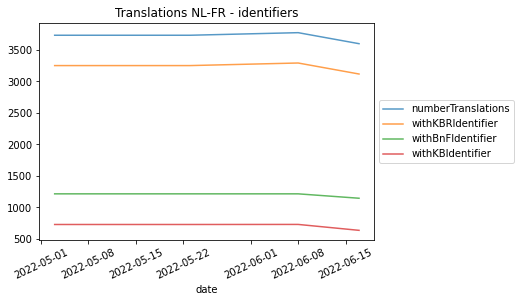

In [6]:
utils.plotTranslationStatsIdentifiers(statsNLFR, 'Translations NL-FR - identifiers')

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

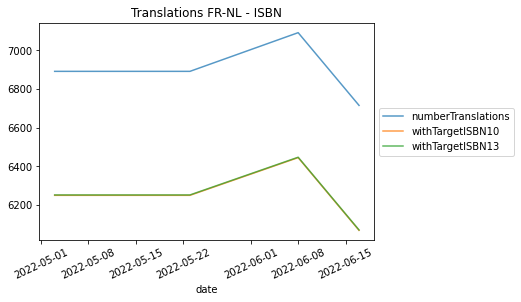

In [7]:
utils.plotTranslationStatsISBN(statsFRNL, 'Translations FR-NL - ISBN')

In [8]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |

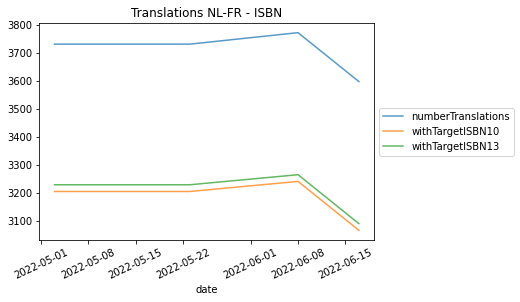

In [9]:
utils.plotTranslationStatsISBN(statsNLFR, 'Translations NL-FR - ISBN')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

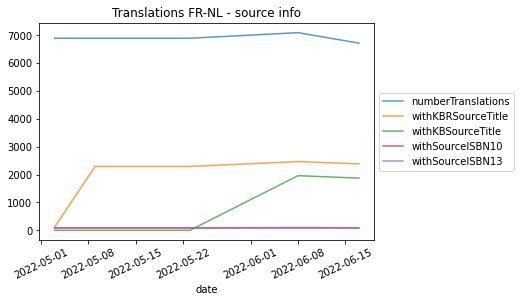

In [10]:
utils.plotTranslationStatsSources(statsFRNL, 'Translations FR-NL - source info')

In [11]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                      |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                 |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246. |
| 2022-05-23 | No changes to previous version.                                                                                              |
| 2022-06-08 | Added publishing directors and included a column for source titles from KB.                                                  |
| 2022-06-17 | Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions).                                           |

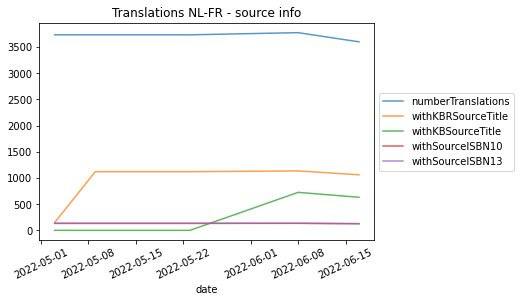

In [12]:
utils.plotTranslationStatsSources(statsNLFR, 'Translations NL-FR - source info')

## All statistics for the 'other' corpus
Compared to above things are only in one graph

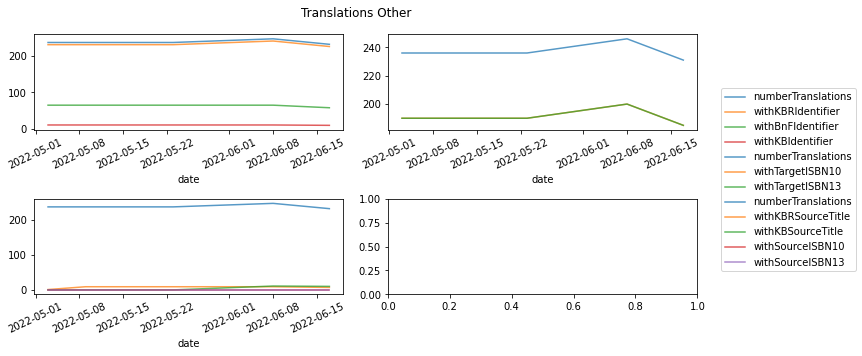

In [13]:
utils.plotTranslationStats(statsOther, 'Translations Other')

In [14]:
contributorMeasurementFiles = [
    '2022-05-03-person-contributor-stats.csv', '2022-05-23-person-contributor-stats.csv',
    '2022-06-16-person-contributor-stats.csv', '2022-05-09-person-contributor-stats.csv',
    '2022-06-07-person-contributor-stats.csv'
]

## Create new manifestation measurements

The following code is used to create new statistics. They can be saved to a CSV file and be taken into account in the section above about existing measurements.

In [15]:
corpus = pd.read_csv('./2022-06-16_after-duplicate-removing/csv/integrated-data-enriched.csv', index_col='targetIdentifier')
corpusNLFR = corpus[(corpus['sourceLanguage'] == 'Dutch') & (corpus['targetLanguage'] == 'French') ]
corpusFRNL = corpus[(corpus['sourceLanguage'] == 'French') & (corpus['targetLanguage'] == 'Dutch') ]
corpusOther = corpus[ ((corpus['sourceLanguage'] != 'Dutch') & (corpus['sourceLanguage'] != 'French')) | ((corpus['targetLanguage'] != 'Dutch') & (corpus['targetLanguage'] != 'French'))]

In [16]:
comment = "Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions)."
measurements = pd.DataFrame([
  utils.createCorpusMeasurements(corpusFRNL, 'FR-NL', comment),
  utils.createCorpusMeasurements(corpusNLFR, 'NL-FR', comment),
  utils.createCorpusMeasurements(corpusOther, 'OTHER', comment)
])

In [17]:
measurements

,date,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment
0,2022-06-17 18:06:44.515046,FR-NL,6715,6069,6071,5980,57,1873,5842,112,2384,1873,80,97,Removed duplicate manifestations with the same...
1,2022-06-17 18:06:44.681536,NL-FR,3597,3065,3089,3115,1141,631,2601,142,1060,631,127,127,Removed duplicate manifestations with the same...
2,2022-06-17 18:06:44.734421,OTHER,231,185,185,225,58,10,201,1,7,10,1,1,Removed duplicate manifestations with the same...


In [18]:
#measurements.to_csv('2022-06-16-translation-stats.csv', index=False)

## Create new contributor measurements

In [19]:
personContributors = pd.read_csv('./2022-06-16_after-duplicate-removing/csv/contributors-persons.csv', index_col='contributorID')

In [20]:
personComment = "Removed duplicate manifestations with the same ISBN10/ISBN13 (different editions)."
personContributorsMeasurements = pd.DataFrame([
    utils.createContributorCorpusMeasurements(personContributors, personComment)
])

In [21]:
personContributorsMeasurements

,date,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withISNIIdentifier,withVIAFIdentifier,withWikidataIdentifier,withBirthDate,withDeathDate,...,withMultipleKBRIdentifiers,withMultipleBnFIdentifiers,withMultipleNTAIdentifiers,withMultipleISNIIdentifiers,withMultipleVIAFIdentifiers,withMultipleWikidataIdentifiers,withMultipleBirthDates,withMultipleDeathDates,withMultipleNationalities,comment
0,2022-06-17 18:06:44.958315,15991,11233,1779,6499,11938,7751,3881,3028,919,...,25,11,8,12,38,1,45,10,120,Removed duplicate manifestations with the same...


In [22]:
#personContributorsMeasurements.to_csv('2022-06-16-person-contributor-stats.csv', index=False)